# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

**1.1 Импортируем библиотеку pandas. Считаем данные из csv-файла в датафрейм и сохраним в переменную 'data'.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

**1.2 Выводим первые 20 строчек датафрейма на эран.**

In [3]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**1.3 Выведем основную информацию о датафрейме с помощью метода info().**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**1.4 Выведем гистограммы методом hist().**

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

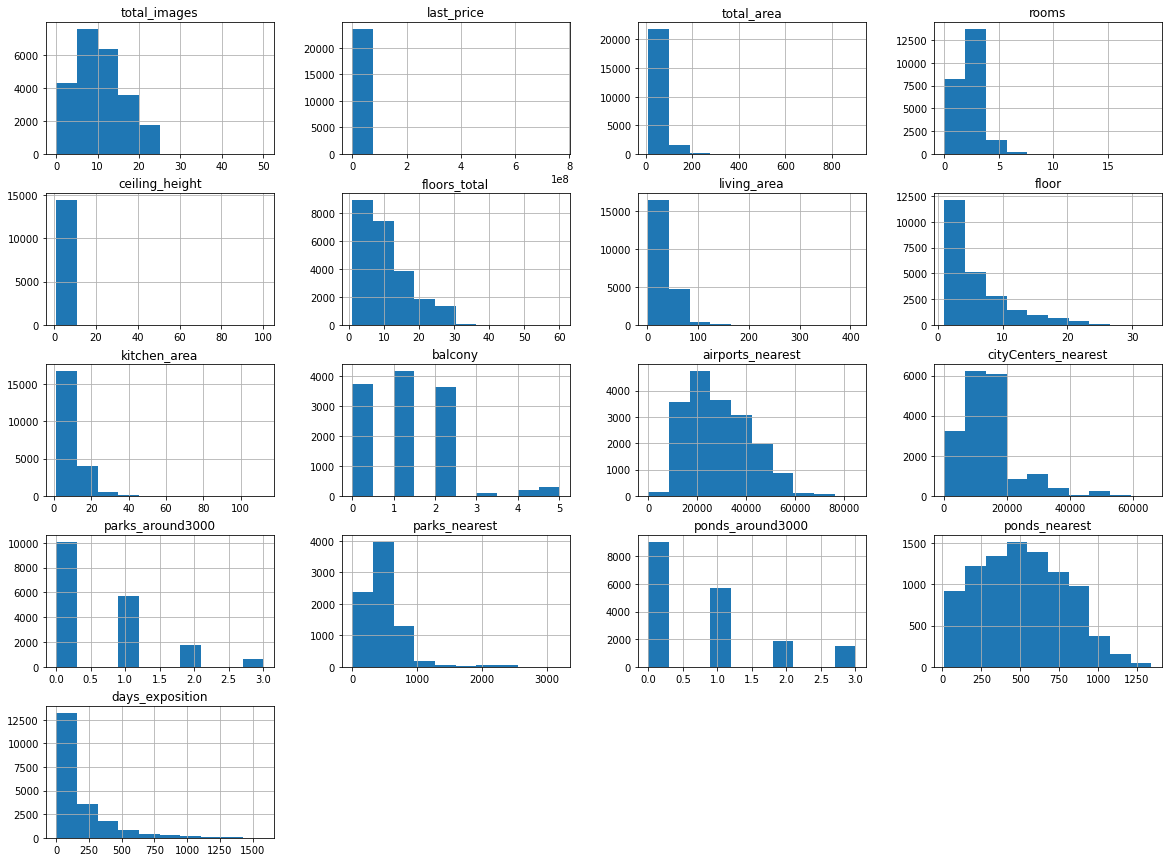

In [5]:
data.hist(figsize=(20,15))

### Предобработка данных

**2.1 Выведем на экран название колонок и проверим их на наличие пробелов, единство языка и регистра. Для удобства использования датафрейма изменим название колонки "cityCenters_nearest" на "citycenters_nearest", приведя к нижнему регистру.**

In [6]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [7]:
data = data.rename(columns={'cityCenters_nearest':'citycenters_nearest'})

**2.2 Выведем количество пропущенных значений для каждого столбца.**

In [8]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
citycenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [9]:
data.isna().mean()*100

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
citycenters_nearest     23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

В данных было обнаружено много пропущенных значений. Высота потолка - 38%, информация об аппартементах - 88%, информация о балконах - 48%, жилая площадь - 8%, площадь кухни - 9%,  ближайший аэропорт - 23%, расстояние до центра - 65%,  расстояние до парка - 65%, количество парков в радиусе  3 км - 23%, расстояние до пруда - 61%, пруд в радиусе  3 км - 23%, количество дней объявления - 13%.

**2.3 Заполним пропущенные значения там, где это возможно.**

1. В столбцах "floors_total" и "locality_name" пропусков немного, менее 1%. Эти строки можем удалить.

In [10]:
data = data.dropna(subset=['floors_total', 'locality_name'])

2. В столбце 'balcony' пропущено 48% строк. Логично предположить, что балконов в этих квартирах нет. Заменяем пропуски на 0.

In [11]:
data['balcony'] = data['balcony'].fillna(0)

3. В столбце 'is_apartment' пропуски в строках могут означать, что квартира не относится к аппартаментам. Меняем пропуски на "False".

In [12]:
data['is_apartment'] = data['is_apartment'].fillna(False)

4. В столбце 'ceiling_height' 38% процентов пропусков. Переменная количественная. Можем заменить на медианное значение, но предварительно восстановим данные и изучим корреляцию высоты потолка на цену объекта и на количество дней объявления.

Исследуем на выбросы столбец 'ceiling_height'.

In [13]:
print(data['ceiling_height'].describe())

count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


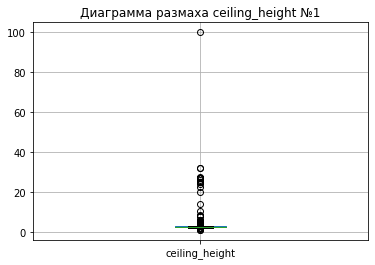

In [14]:
data.boxplot(column='ceiling_height')
plt.title('Диаграмма размаха ceiling_height №1')
plt.show()

Выброс в 100 метров мешает анализу. Удалим его из датасета и построем новую диаграмму размаха.

In [15]:
data = data.query('ceiling_height != 100')

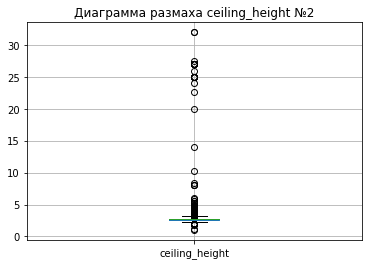

In [16]:
data.boxplot(column='ceiling_height')
plt.title('Диаграмма размаха ceiling_height №2')
plt.show()

Логично предположить, что высота потолка более 20 метров - это опечатка при заполнении и поделим такие значения на 10.

In [17]:
def height(ceiling_heigh):
    if ceiling_heigh >= 20:
        return ceiling_heigh/10
    else:
        return ceiling_heigh
    
data['ceiling_height'] = data['ceiling_height'].apply(height) 

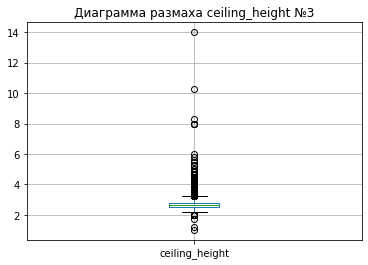

In [18]:
data.boxplot(column='ceiling_height')
plt.title('Диаграмма размаха ceiling_height №3')
plt.show()

Диаграмма рассеивания показала, что в 'ceiling_height' есть выбросы. Но для дальнейшего анализа нам эти значения не очень важны. Строки удалять не буду, чтобы не потерять другие значения и не уменьшать датасет.

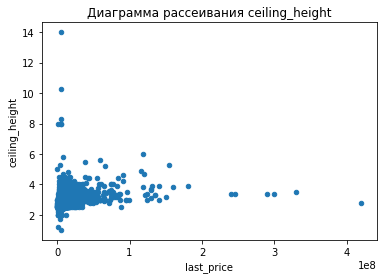

In [19]:
data.plot(x='last_price', y='ceiling_height', kind='scatter')
plt.title('Диаграмма рассеивания ceiling_height')
plt.show()

In [20]:
data['ceiling_height'].corr(data['last_price'])

0.3528085649896643

In [21]:
data['ceiling_height'].describe()

count    14480.000000
mean         2.728823
std          0.314029
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         14.000000
Name: ceiling_height, dtype: float64

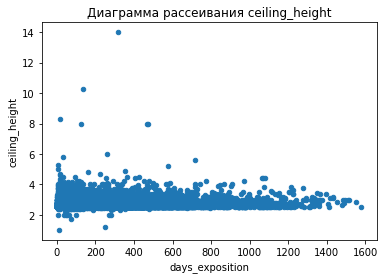

In [22]:
data.plot(x='days_exposition', y='ceiling_height', kind='scatter')
plt.title('Диаграмма рассеивания ceiling_height')
plt.show()

In [23]:
print(data['ceiling_height'].corr(data['days_exposition']))

0.11627723225101133


Корреляция высоты потолков от 'last_price' и 'days_exposition' слабая. Можем заменить на медианные значения.

In [24]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

5. Пропуски в 'living_area' можем заполнить через соотношение всей площади и жилой в зависимости от количества комнат.
Сначала сгруппируем таблицу по количеству комнат и найдем коэффициент жилой площади к общей. Потом с помощью цикла заполним пропуски.

In [25]:
ratio = data.groupby('rooms')['living_area'].mean()/data.groupby('rooms')['total_area'].mean()
for row in ratio.index:
        data.loc[(data['living_area'].isnull())&(data['rooms'] == row), 'living_area'] = data.loc[(data['living_area'].isnull()) & (data['rooms'] == row), 'total_area'] * ratio[row]                                        

6. По аналогии заполним пропуски в 'kitchen_area'. Если количество комнат 0, можем предположить, что это студии, и площадь кухни заполнить 0.

In [26]:
ratio = data.groupby('rooms')['kitchen_area'].mean()/data.groupby('rooms')['total_area'].mean()

for row in ratio.index:
    if row != 0:
        data.loc[(data['kitchen_area'].isnull())&(data['rooms'] == row), 'kitchen_area'] = data.loc[(data['kitchen_area'].isnull()) & (data['rooms'] == row), 'total_area'] * ratio[row]
    elif row == 0:
        data.loc[(data['kitchen_area'].isnull())&(data['rooms'] == 0), 'kitchen_area'] = 0
        

После замены пропусков синтетическими данными проведем проверку на корректность значений всех наших площадей, так как есть коридоры, сан. узлы и балконы.

In [27]:
def anomaly(rol):
    sum = rol['living_area'] + rol['kitchen_area']
    total = rol['total_area']
    if total*0.9 >= sum:
        return 'результат верен'
    else:
        return 'аномалия'

data['anomaly'] = data.apply(anomaly, axis=1)
print(len(data.query('anomaly == "аномалия"')))

data_anomaly = data.query('anomaly == "аномалия"')
print(data_anomaly[['total_area', 'living_area', 'kitchen_area']])

649
       total_area  living_area  kitchen_area
41           74.0         59.0     12.000000
171          49.0         38.0     10.000000
184          30.2         26.1      6.200000
220          37.0         28.0      9.000000
319          59.7         47.4      6.400000
...           ...          ...           ...
23420        29.9         20.3      7.581718
23511        42.5         27.6     10.776690
23521        65.0         44.0     15.300000
23579        24.8         18.0      6.288515
23680        59.0         52.0      7.000000

[649 rows x 3 columns]


Выявлено 649 аномалии из 23565, это 2,7% из общего количества. Предполагаю, эти аномалии были изначально в данных. Избавимся от аномалий, заменив жилую площадь по формуле: living = 0.9*total -  kitchen. 

In [28]:
def reset_anomaly(rol):
    kitchen = rol['kitchen_area']
    living = rol['living_area']
    total = rol['total_area']
    try:
        if total*0.9 >= kitchen + living:
            return living
        elif total*0.9 < kitchen + living:
            living = 0.9*total -  kitchen
            return living
    except:
        pass
    
data['living_area'] =  data.apply(reset_anomaly,axis=1)

In [29]:
data['anomaly'] = data.apply(anomaly, axis=1)
print(len(data.query('anomaly == "аномалия"')))

data_anomaly = data.query('anomaly == "аномалия"')
print(data_anomaly[['total_area', 'living_area', 'kitchen_area']])

16
       total_area  living_area  kitchen_area
551         31.59    19.151000      9.280000
1544        26.00    16.807202      6.592798
3752        26.00    16.807202      6.592798
5268        26.00    16.807202      6.592798
5353        26.00    16.807202      6.592798
6892        25.36    16.393486      6.430514
10540       26.00    16.807202      6.592798
11938       26.00    16.807202      6.592798
12271       69.00    48.370000     13.730000
14321       27.00    17.700000      6.600000
15643       57.00    43.016337      8.283663
17405       26.00    16.807202      6.592798
19174       26.00    16.807202      6.592798
19807       13.00     8.403601      3.296399
20989       26.00    16.807202      6.592798
22941       69.30    44.797656     17.572344


In [30]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
citycenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
anomaly                     0
dtype: int64

7.  'citycenters_nearest'  заменим на маркер "55555". При анализе, эти значения будут отфильтрованы. 

In [31]:
data['citycenters_nearest'] = data['citycenters_nearest'].fillna(55555)

'parks_around3000', 'ponds_around3000' пропуски в этих столбцах могут означать, что в радиусе 3 км нет ни парка, ни пруда. Заменяю на 0.

In [32]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
citycenters_nearest         0
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
anomaly                     0
dtype: int64


'airports_nearest', 'parks_nearest',  'ponds_nearest' оставим без изменений.

```python

columns = [col1, col2, col3]

for i in columns:
    df[i] = df[i].fillna(0)

```

8. 'days_exposition' пропущенные значения оставляю. Пропуски могут означать, что объявление еще актуально и квартира не продана.

In [33]:
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
citycenters_nearest         0
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
anomaly                     0
dtype: int64


**2.4 Заменим вещественный тип данных на целочисленный в столбцах, где это возможно.**

In [34]:
list = ['last_price', 'total_area', 'floors_total', 'living_area', 'kitchen_area', 'balcony', 'airports_nearest', \
        'citycenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_nearest', 'ponds_around3000', 'days_exposition']
for i in list:
    try:
        data[i] = data[i].astype(int)
    except:
        pass

'first_day_exposition' переведем в формат даты.

In [35]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

**2.5 Обработка дубликатов. Проверям на наличие явных дубликатов и избавимся от неявных.**

In [36]:
data.duplicated().sum()

0

    Явных дубликатов нет.
    Для поиска неявных дубликатов приведем все значения к нижнему регистру. Заменим "ё" на "е". Следующим шагом для поиска дубликатов избавимся от слов: "поселок", "деревня" и т.д.

In [37]:
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].replace('ё', 'е', regex=True)
data['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары', 'городской поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина',
       'деревня федоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'поселок металлострой',
       'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок городского типа ефимовский', 'поселок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет

In [38]:
list = ['деревня', 'поселок городского типа', 'поселок', 'садовое товарищество', 'село', 'городской поселок', 'поселок станции', 'поселок при железнодорожной станции', 'садоводческое некоммерческое товарищество', 'коттеджный поселок', 'поселок городского типа имени', 'коттеджный']
replacement = '' 
for i in list:
    data['locality_name'] = data['locality_name'].replace(i, replacement, regex=True)
data['locality_name'] = data['locality_name'].str.strip()
data['locality_name'].unique()    

array(['санкт-петербург', 'шушары', 'городской  янино-1', 'парголово',
       'мурино', 'ломоносов', 'сертолово', 'петергоф', 'пушкин',
       'кудрово', 'коммунар', 'колпино', 'красный бор', 'гатчина',
       'федоровское', 'выборг', 'кронштадт', 'кировск', 'новое девяткино',
       'металлострой', 'лебяжье', 'сиверский', 'молодцово',
       'кузьмоловский', 'новая ропша', 'павловск', 'пикколово',
       'всеволожск', 'волхов', 'кингисепп', 'приозерск', 'сестрорецк',
       'куттузи', 'аннино', 'ефимовский', 'плодовое', 'заклинье',
       'торковичи', 'первомайское', 'красное', 'понтонный', 'сясьстрой',
       'старая', 'лесколово', 'новый свет', 'сланцы', 'путилово',
       'ивангород', 'шлиссельбург', 'никольское', 'зеленогорск',
       'сосновый бор', 'оржицы', 'кальтино', 'романовка', 'бугры',
       'рощино', 'кириши', 'луга', 'волосово', 'отрадное', 'павлово',
       'оредеж', 'копорье', 'молодежное', 'тихвин', 'победа', 'нурма',
       'синявино', 'тосно', 'стрельна', 'бокситог

**2.6 Исследуем аномалии. Для дальнейшего анализа устраним редкие и выбиващиеся значения в столбцах: 'total_area', 'living_area', 'kitchen_area', 'rooms', 'last_price', 'days_exposition'.**

1. Исследуем на аномалии 'total_area'. Выведем на экран показатели столбца, диаграмму рассеивания и гистограмму.

count    23564.000000
mean        60.096715
std         35.668783
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        900.000000
Name: total_area, dtype: float64


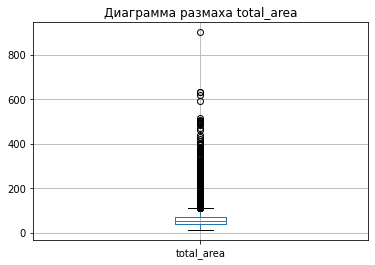

In [39]:
print(data['total_area'].describe())
data.boxplot(column='total_area')
plt.title('Диаграмма размаха total_area')
plt.show()

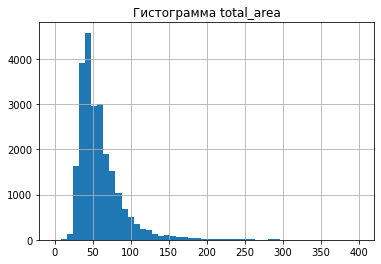

In [40]:
data['total_area'].hist(range=(0, 400), bins=50)
plt.title('Гистограмма total_area')
plt.show()

Диаграмма рассеявания показала, что квартиры более 150 метров редкие и выбивающиеся значения. От них можно узбавиться.

In [41]:
data = data.query('total_area < 150')

2. Исследуем 'rooms' на выбросы и аномалии.

count    22985.000000
mean         1.998608
std          0.946993
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64


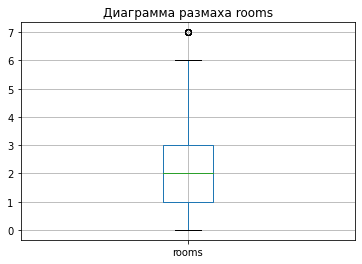

In [42]:
print(data['rooms'].describe())
data.boxplot(column='rooms')
plt.title('Диаграмма размаха rooms')
plt.show()

На диаграмме размаха видно, что 7 -комнатная квартира является выбросом. Можем избавиться от этих строк. А нормальные значения распредлены между 1 и 3 комнатами

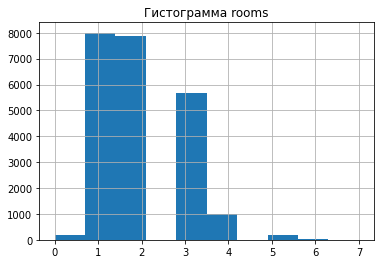

In [43]:
data['rooms'].hist()
plt.title('Гистограмма rooms')
plt.show()

На гистограмме видно, что 5-и, 6-и и 7-и комнатные квартиры очень редкие. Избавимся от них.

In [44]:
data = data.query('rooms <=4')

3. Исследуем 'last_price' на выбросы и аномалии.

count    2.278200e+04
mean     5.633612e+06
std      4.470638e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.550000e+06
75%      6.500000e+06
max      1.240000e+08
Name: last_price, dtype: float64


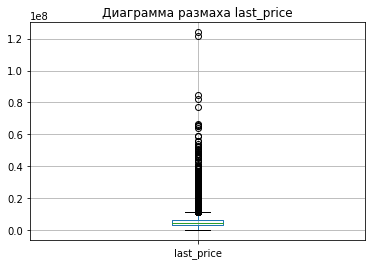

In [45]:
print(data['last_price'].describe())
data.boxplot(column='last_price')
plt.title('Диаграмма размаха last_price')
plt.show()

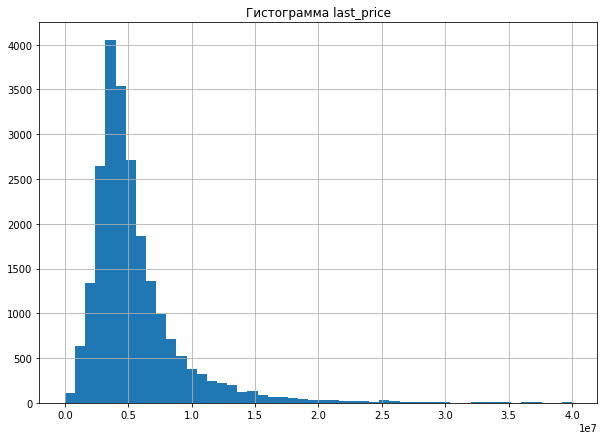

In [46]:
data['last_price'].hist(range=(0, 40000000), bins = 50, figsize=(10,7))
plt.title('Гистограмма last_price')
plt.show()

На диаграмме рассеивания и гистограмме видно, что квартиры более 20 млн редкие. Избавимся от этих значений.

In [47]:
data = data.query('last_price < 20000000')

5. Исследуем 'days_exposition' на выбросы и аномалии.

count    19574.000000
mean       176.114795
std        214.944585
min          1.000000
25%         44.000000
50%         93.000000
75%        224.000000
max       1580.000000
Name: days_exposition, dtype: float64


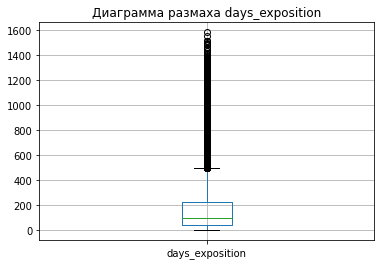

In [48]:
print(data['days_exposition'].describe())
data.boxplot(column='days_exposition')
plt.title('Диаграмма размаха days_exposition')
plt.show()

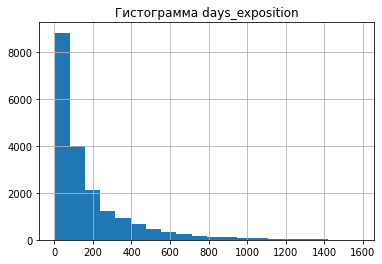

In [49]:
data['days_exposition'].hist(bins=20)
plt.title('Гистограмма days_exposition')
plt.show()

Значения больше 800 дней являются редкими. Исключим их. И также учтем, что есть пустые значения в столбце 'days_exposition'.

In [50]:
data = data.loc[(data['days_exposition'] < 800) | (data['days_exposition'].isnull())]

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21923 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21923 non-null  int64         
 1   last_price            21923 non-null  int64         
 2   total_area            21923 non-null  int64         
 3   first_day_exposition  21923 non-null  datetime64[ns]
 4   rooms                 21923 non-null  int64         
 5   ceiling_height        21923 non-null  float64       
 6   floors_total          21923 non-null  int64         
 7   living_area           21923 non-null  int64         
 8   floor                 21923 non-null  int64         
 9   is_apartment          21923 non-null  bool          
 10  studio                21923 non-null  bool          
 11  open_plan             21923 non-null  bool          
 12  kitchen_area          21923 non-null  int64         
 13  balcony         

**В результате предобработки осталось 21923 строки из 23698. Это 92,5% от исходного датасета.**

### Посчитайте и добавьте в таблицу новые столбцы

**3.1 Создадим новый столбец 'цена одного квадратного метра'. Назовем его 'price_per_square_meter'. Округлим до целых значений для наглядности.**

In [52]:
data['price_per_square_meter'] = data['last_price']/data['total_area']
data['price_per_square_meter'] = data['price_per_square_meter'].astype(int)

**3.2 Создадим столбец, который покажет день недели публикации объявления (0 — понедельник, 1 — вторник и так далее). Назовем его 'day_of_week'.**

In [53]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

**3.3 Создадим столбец 'месяц публикации объявления'. Назовем его 'month_exposition'.**

In [54]:
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month

**3.4 Создадим столбец 'год публикации объявления'. Назовем его 'year_exposition'.**

In [55]:
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year

**3.5 Добавим столбец тип этажа квартиры (значения — «‎первый», «последний», «другой»). Для этого разделим все значения на категории.**

In [56]:
def type_floor(rol):
    floor = rol['floor']
    floors_total = rol['floors_total']
    try:
        if floor == floors_total and floors_total != 1:
            return 'последний'
        elif floor == 1:
            return 'первый'
        else:
            return 'другой'
    except:
        pass
    
data['type_floor'] = data.apply(type_floor, axis=1)

In [57]:
data[['floor', 'floors_total', 'type_floor']]

,floor,floors_total,type_floor
0,8,16,другой
1,1,11,первый
2,4,5,другой
4,13,14,другой
5,5,12,другой
...,...,...,...
23694,3,5,другой
23695,4,5,другой
23696,1,3,первый
23697,12,17,другой


**3.6 Добавим столбец: расстояние до центра города в километрах. Создадим функцию и не забудем, что пропуски были заполнены значением '5555'. Переведем из км в м до целых значений.**

In [58]:
def citycenters_nearest_km(rol):
    citycenters_nearest = rol['citycenters_nearest']
    try:
        if citycenters_nearest != 55555:
            return citycenters_nearest/1000
        elif citycenters_nearest == 55555:
            return citycenters_nearest
    except:
        pass
    
data['citycenters_nearest_km'] = data.apply(citycenters_nearest_km, axis=1)  

In [59]:
data['citycenters_nearest_km'] = data['citycenters_nearest_km'].astype(int) 

In [60]:
data[['citycenters_nearest_km', 'citycenters_nearest']]

,citycenters_nearest_km,citycenters_nearest
0,16,16028
1,18,18603
2,13,13933
4,8,8098
5,55555,55555
...,...,...
23694,4,4232
23695,55555,55555
23696,55555,55555
23697,10,10364


### Проведем исследовательский анализ данных

**4.1 Построим гистаграммы для каждого параметра.**

1. Изучим 'last_price'.

In [61]:
data['last_price'].describe()

count    2.192300e+04
mean     5.251067e+06
std      2.991009e+06
min      1.219000e+04
25%      3.350000e+06
50%      4.500000e+06
75%      6.300000e+06
max      1.999900e+07
Name: last_price, dtype: float64

<AxesSubplot:title={'center':'Цена объекта'}, ylabel='Frequency'>

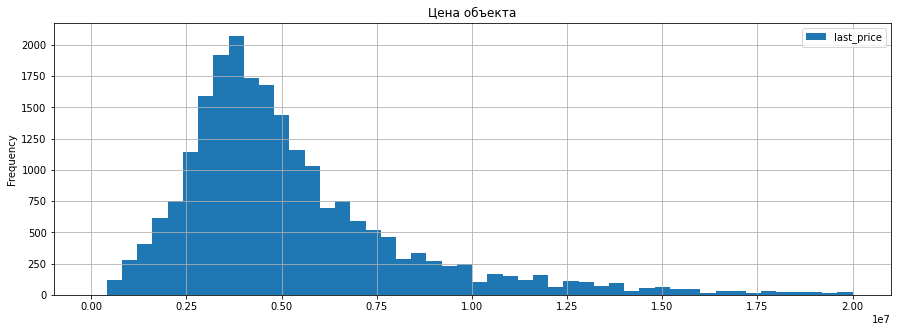

In [62]:
data.plot(kind='hist', y='last_price', bins=50, title='Цена объекта', grid=True, figsize=(15,5))

Медианное значение - 4,5 млн, среднее арифметиское - 5,2 млн, стандартное отклонение - 2,9 млн. Гистограмма имеет более длинный хвост справа, что говорит о правостороннем распределении цены.

Можем сделать вывод, что большинство квартир стоят от 3,3 млн до 6,3 млн. 

2. Изучим 'total_area'.

<AxesSubplot:title={'center':'Общая площадь'}, ylabel='Frequency'>

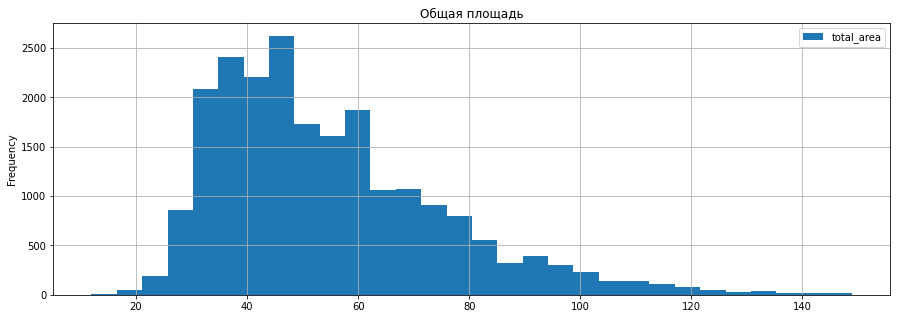

In [63]:
data.plot(kind='hist', y='total_area', title='Общая площадь', grid=True, figsize=(15,5), bins = 30)

In [64]:
data['total_area'].describe()

count    21923.000000
mean        54.601742
std         20.680898
min         12.000000
25%         39.000000
50%         50.000000
75%         65.000000
max        149.000000
Name: total_area, dtype: float64

Медианное значение 'total_area' - 50 кв. метров, среднее арифметиское - 54 кв. метра, стандартное отклонение - 20 кв метров. Гистрограмма имеет более длинный хвост справа, распределение правостороннее.

Большинство квартир имеет площадь от 39 кв.м до 65 кв.м.

3. Построим гистограмму 'living_area'.

<AxesSubplot:title={'center':'Жилая площадь'}, ylabel='Frequency'>

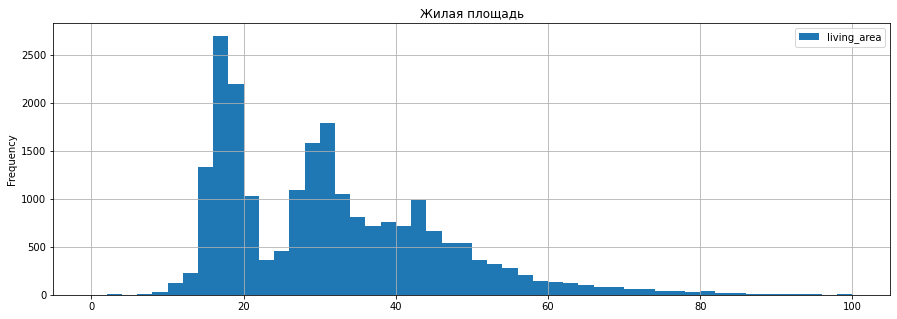

In [65]:
data.plot(kind='hist', y='living_area', title='Жилая площадь', grid=True, figsize=(15,5), bins = 50, range=(0,100))

In [66]:
data['living_area'].describe()

count    21923.000000
mean        30.917666
std         14.022725
min          2.000000
25%         18.000000
50%         29.000000
75%         40.000000
max        113.000000
Name: living_area, dtype: float64

Гистограмма имеет 2 пика, около 16 кв. м и около 32 кв. м. Можно сделать вывод, что это самые популярные планировки. Большинство квартир жилой площадью от 18 кв.м до 40 кв.м.

4. Построим гистограмму 'kitchen_area'.

<AxesSubplot:title={'center':'Площадь кухни'}, ylabel='Frequency'>

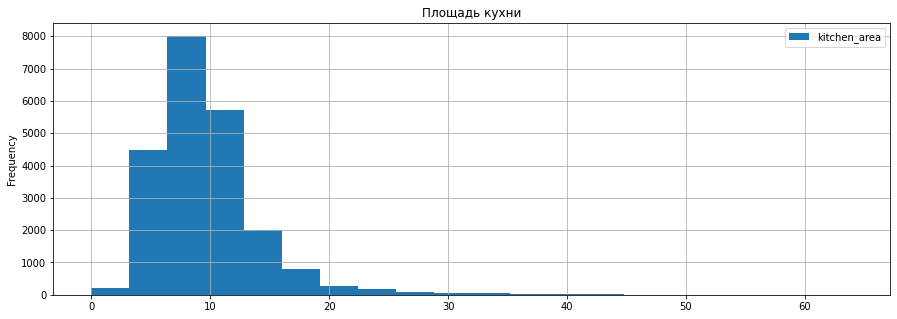

In [67]:
data.plot(kind='hist', y='kitchen_area', title='Площадь кухни', grid=True, figsize=(15,5), bins = 20)

In [68]:
data['kitchen_area'].describe()

count    21923.000000
mean         9.580897
std          4.436967
min          0.000000
25%          7.000000
50%          9.000000
75%         11.000000
max         64.000000
Name: kitchen_area, dtype: float64

Можем сделать вывод, что большинство квартир имеет площадь кухни от 6 кв.м до 11 кв.м. 

5. Построим гистограмму 'rooms'.

<AxesSubplot:title={'center':'Количество комнат'}, ylabel='Frequency'>

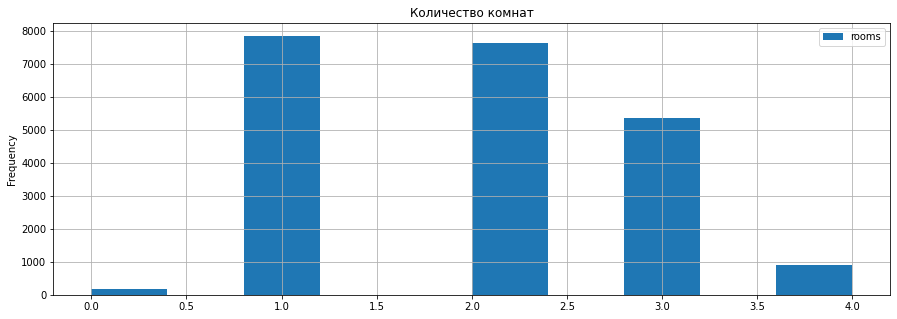

In [69]:
data.plot(kind='hist', y='rooms', title='Количество комнат', grid=True, figsize=(15,5), bins = 10)

In [70]:
data['rooms'].describe()

count    21923.000000
mean         1.950965
std          0.893628
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: rooms, dtype: float64

В датасете преобладают квартиры с 1 и 2-мя комнатами. Реже всего встречаются студии и 4-комнатные.

6. Построим гистограмму 'ceiling_height'.

<AxesSubplot:title={'center':'Высота потолка'}, ylabel='Frequency'>

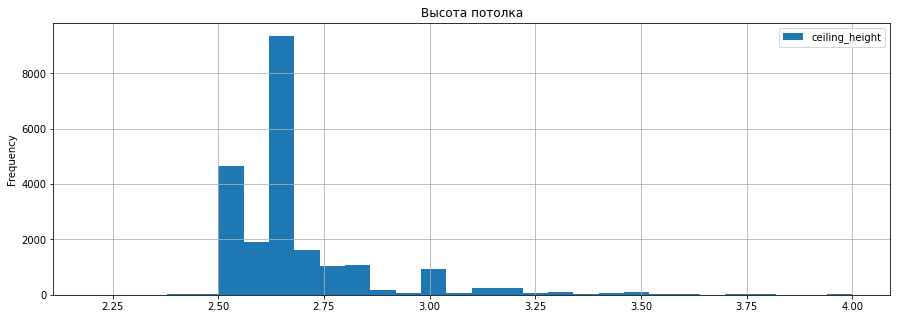

In [71]:
data.plot(kind='hist', y='ceiling_height', title='Высота потолка', grid=True, \
figsize=(15,5), bins = 30, range=(2.2, 4))

In [72]:
data['ceiling_height'].describe()

count    21923.000000
mean         2.682245
std          0.226952
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

Гистограмма имеет пик на значении 2,60-2,7. Можем сделать вывод, что большинство квартир имеют именно такую высоту потолка. Выше 2,75 - редкие экземпляры.

6. Построим гистограмму 'floor'.

<AxesSubplot:title={'center':'Этаж'}, ylabel='Frequency'>

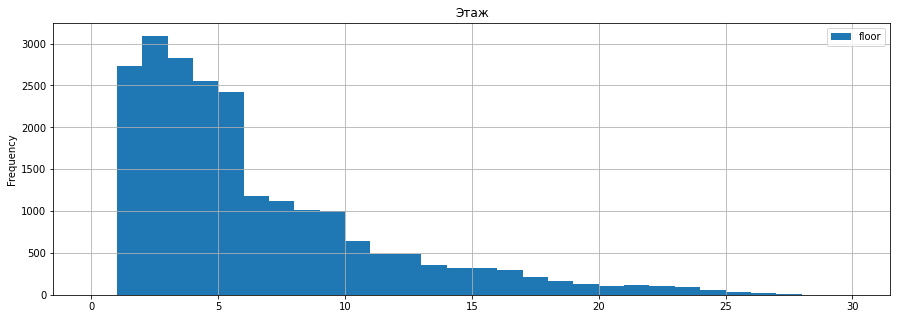

In [73]:
data.plot(kind='hist', y='floor', title='Этаж', grid=True, figsize=(15,5), bins = 30, range=(0, 30))

In [74]:
data['floor'].describe()

count    21923.000000
mean         5.916298
std          4.901202
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Можем сделать вывод, что большинство квартир из датасета находятся до 6 этажа. Реже - выше 10 этажа.

7. Построим гистограмму 'type_floor'.

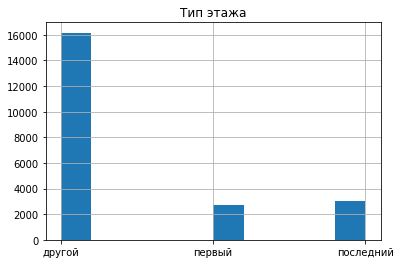

In [75]:
data['type_floor'].hist()
plt.title('Тип этажа')
plt.show()

Можем сделать вывод, что большинство квартир находится не на первом и не на последнем этажа. Квартиры на первом и последнем этаже в меньшинстве, примерно в одинаковом количестве.

8. Построим гистограмму 'floors_total'.

<AxesSubplot:title={'center':'Количество этажей в доме'}, ylabel='Frequency'>

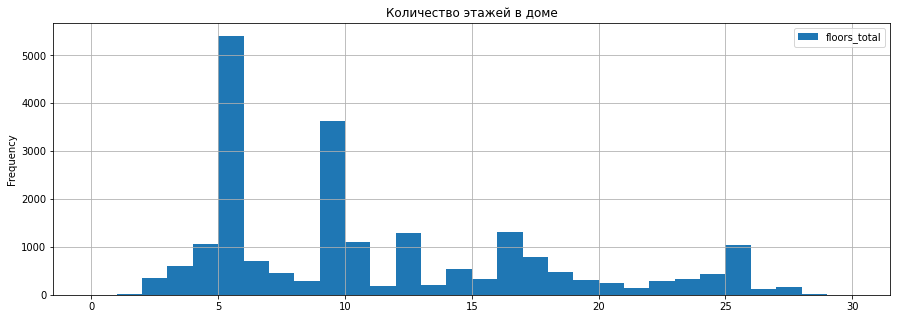

In [76]:
data.plot(kind='hist', y='floors_total', title='Количество этажей в доме', grid=True, figsize=(15,5), bins = 30, range=(0, 30))

На гистограмме видно, что 5-и и 9-этажные дома преобладают в нашем датасете. 

9. Построим гистограмму 'citycenters_nearest'. Вспомним, что ранее мы заполняли пустые значения на '55555'. Отфильтруем их.

In [77]:
good_data = data.query('citycenters_nearest != 55555')

<AxesSubplot:title={'center':'Расстояние до центра'}, ylabel='Frequency'>

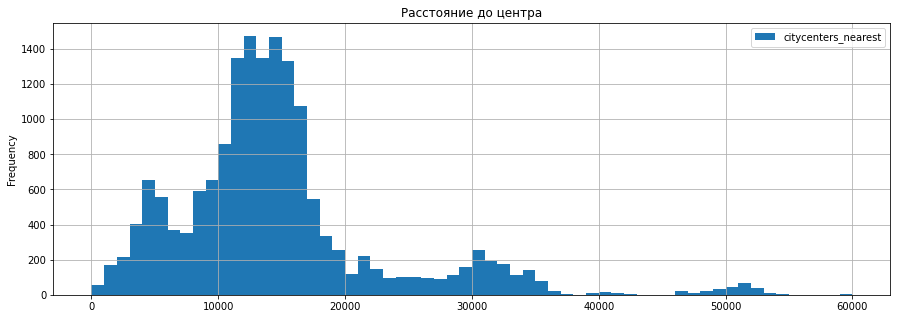

In [78]:
good_data.plot(kind='hist', y='citycenters_nearest', title='Расстояние до центра', \
grid=True, figsize=(15,5), bins = 60, range = (0, 60000))

In [79]:
good_data['citycenters_nearest_km'].describe()

count    16579.000000
mean        14.170095
std          8.488765
min          0.000000
25%         10.000000
50%         13.000000
75%         16.000000
max         65.000000
Name: citycenters_nearest_km, dtype: float64

На гистограмме виден пик между 10 и 16 км от центра. Дальше 20 км квартир меньше в датасете.

10. Построим гистограмму 'airports_nearest'.

<AxesSubplot:title={'center':'Расстояния до ближайшего аэропорта'}, ylabel='Frequency'>

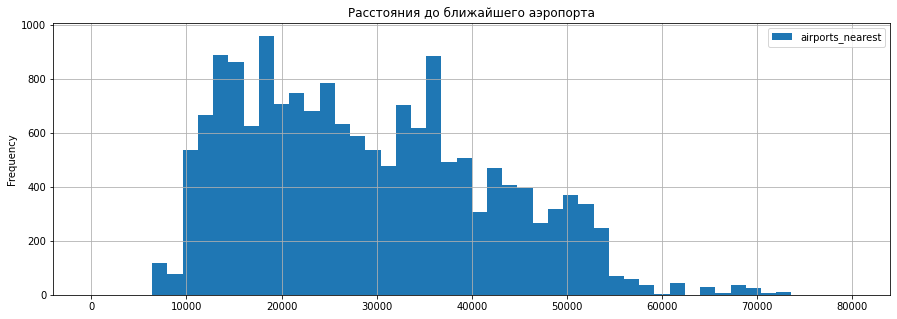

In [80]:
data.plot(kind='hist', y='airports_nearest', title='Расстояния до ближайшего аэропорта', \
          grid=True, figsize=(15,5), range=(0, 80000), bins=50)

In [81]:
data['airports_nearest'].describe()

count    16562.000000
mean     28941.324719
std      12874.714849
min          0.000000
25%      18277.250000
50%      27155.500000
75%      37560.250000
max      84853.000000
Name: airports_nearest, dtype: float64

Можем сделать вывод, что большинство квартир находятся от ближайшего аэропорта от 18 км до 37 км.

11. Построим гистограмму 'parks_nearest'.

<AxesSubplot:title={'center':'Расстояние до ближайшего парка'}, ylabel='Frequency'>

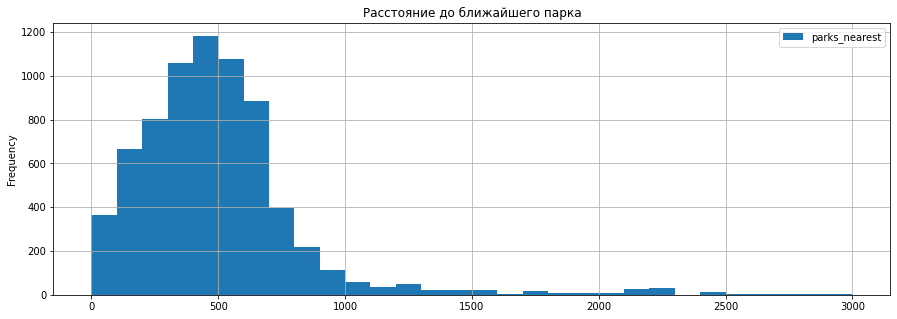

In [82]:
data.plot(kind='hist', y='parks_nearest', title='Расстояние до ближайшего парка', \
grid=True, figsize=(15,5), range=(0, 3000), bins=30)

In [83]:
data['parks_nearest'].describe()

count    7095.000000
mean      493.425229
std       337.907602
min         1.000000
25%       290.000000
50%       458.000000
75%       615.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Из исследования можно сделать вывод, что большинство квартир находятся от 300 до 600 метров от парков. 

12. Построим гистограмму 'weekday_exposition' и 'month_exposition'.

<AxesSubplot:title={'center':'День недели публикации объявления'}, ylabel='Frequency'>

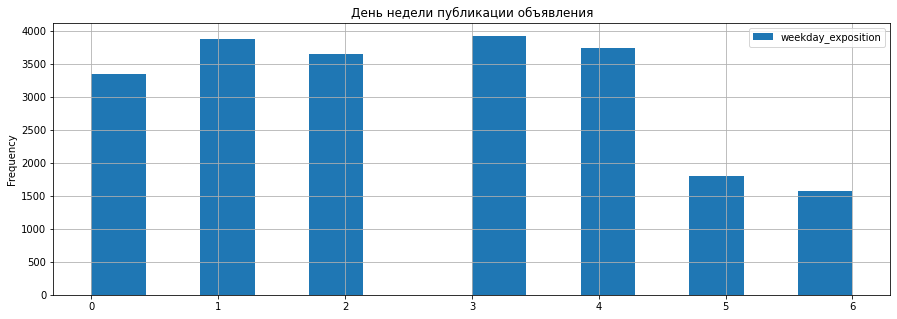

In [84]:
data.plot(kind='hist', y='weekday_exposition', title='День недели публикации объявления', grid=True, figsize=(15,5), bins=14)

<AxesSubplot:title={'center':'Месяц публикации объявления'}, ylabel='Frequency'>

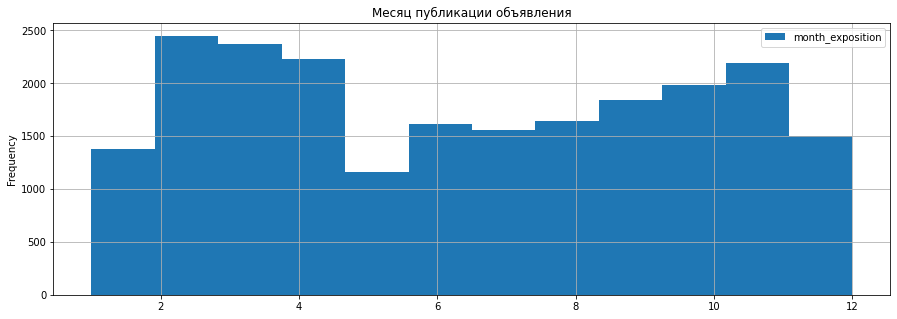

In [85]:
data.plot(kind='hist', y='month_exposition', title='Месяц публикации объявления', grid=True, figsize=(15,5), bins=12)

    Можно сделать вывод, что меньше всего объявлений выставляют в выходные дни: субботу и воскресенье. В остальные дни недели активность примерно одинаковая.
    Также можно отметить, что больше всего активности с февраля по май. Летом активность спадает, осенью растет и достигает пика в ноябре.

13. Изучим, как быстро продавались квартиры ('days_exposition').

<AxesSubplot:title={'center':'Количество дней публикации объявления'}, ylabel='Frequency'>

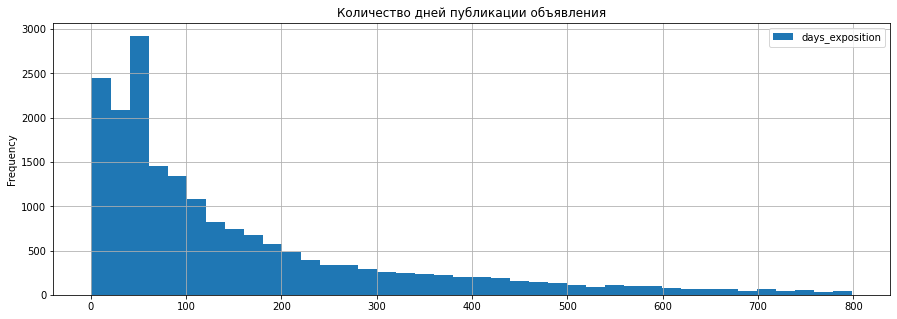

In [86]:
data.plot(kind='hist', y='days_exposition', title='Количество дней публикации объявления', \
          grid=True, figsize=(15,5), bins=40)

In [87]:
data['days_exposition'].describe()

count    19045.000000
mean       152.765398
std        162.854396
min          1.000000
25%         43.000000
50%         90.000000
75%        206.000000
max        799.000000
Name: days_exposition, dtype: float64

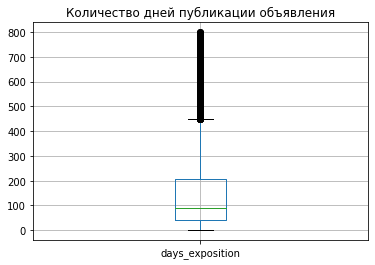

In [88]:
data.boxplot(column='days_exposition')
plt.title('Количество дней публикации объявления')
plt.show()

Изучив 'days_exposition', можем сказать, что медиана значений этого столбца - 90 дней, среднее значение - 152 дня. Разброс между медианой и средним, свидетельствуем о том, что в данных есть выбросы. 
Можно сказать, что в среднем продажа занимает от 43 дней до 206 дней. Объявления, висящие более 450 дней, можно назвать необычно долгими продажами. 

**4.2 Исследуем какие факторы больше всего влияют на общую (полную) стоимость объекта: общая площадь, жилая площадь, площадь кухни, количество комнат, типа этажа, на котором расположена квартира (первый, последний, другой), даты размещения (день недели, месяц, год).**

Изучим корелляцию между общей стоимостью и общей площади, жилой площади, площади кухни, этажа.

array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='living_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='total_area'>],
       [<AxesSubplot:xlabel='last_price', ylabel='living_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='living_area'>],
       [<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='kitchen_area'>,
        <AxesSubp

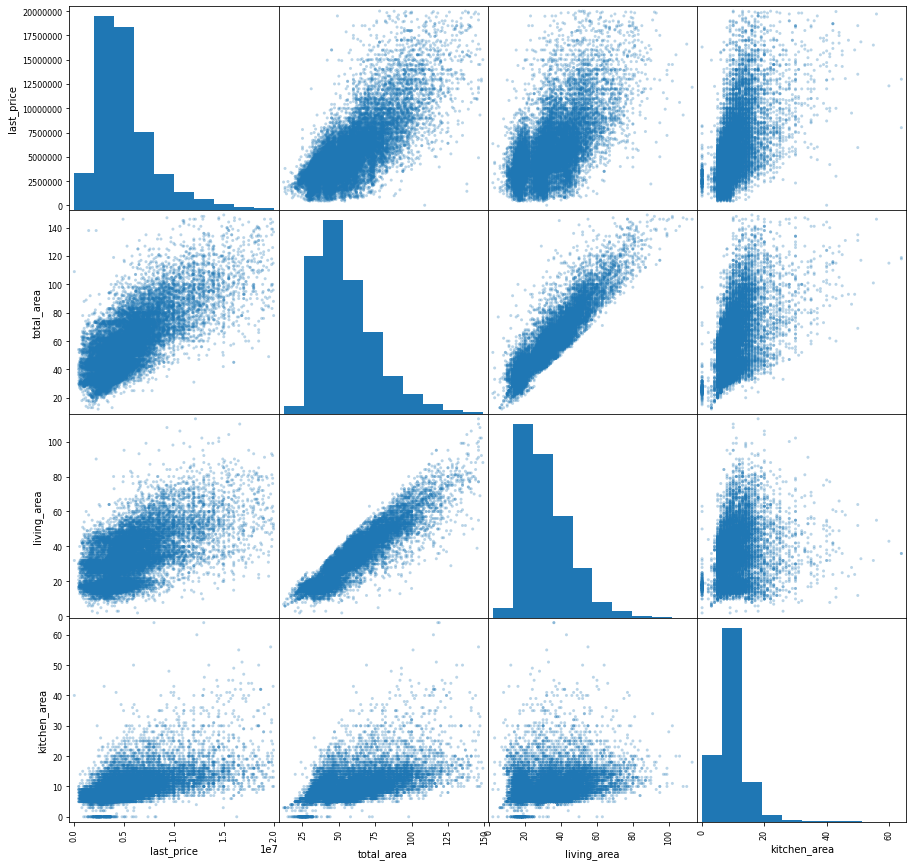

In [89]:
pd.plotting.scatter_matrix(data[['last_price', 'total_area', 'living_area', 'kitchen_area']], figsize=(15,15), alpha=0.3)

In [90]:
data_corr = data[['last_price', 'total_area', 'living_area', 'kitchen_area']].corr()
data_corr

,last_price,total_area,living_area,kitchen_area
last_price,1.000000,0.755906,0.631298,0.563488
total_area,0.755906,1.000000,0.920289,0.529043
living_area,0.631298,0.920289,1.000000,0.255914
kitchen_area,0.563488,0.529043,0.255914,1.000000


<AxesSubplot:>

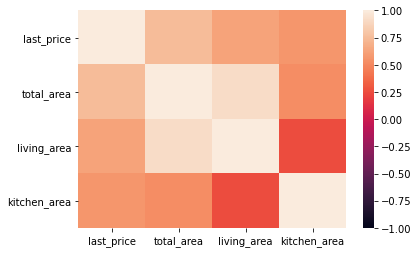

In [92]:
seaborn.heatmap(data_corr, vmin = -1, vmax = 1)

**Вывод:** 
 1. Из графиков видно, больше всего влияет на полную стоимость квартиры - общая площадь. Коэффициент корреляции составляет 0,75. Чем больше площадь - тем больше стоимость.
 2. Жилая площадь также влияет на полную стоимость квартиры, но уже в меньшей степени. Коэффициент корреляции 0,63.
 3. Корреляция площади кухни и полной стоимости квартиры - 0,56. Зависимость есть, но маленькая.

Для исследования зависимости на стоимость квартиры количества комнат, типа этажа, даты размещения - рассчитаем среднюю и медианную цену и построим сводные таблицы. 

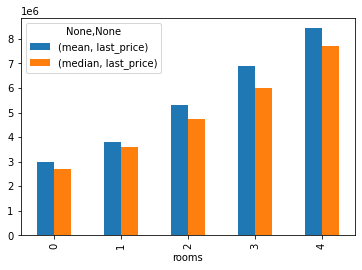

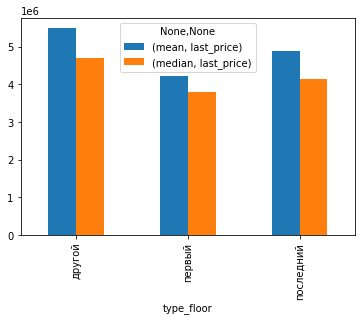

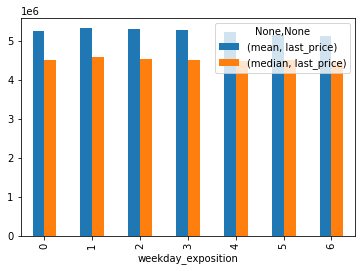

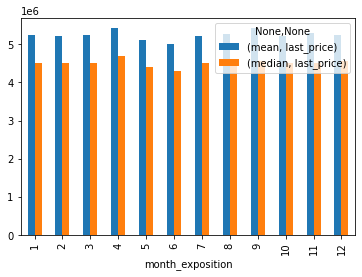

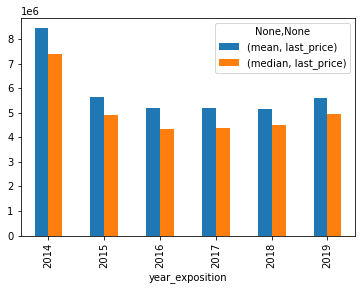

In [93]:
list = ['rooms', 'type_floor', 'weekday_exposition', 'month_exposition', 'year_exposition']

for factor in list:
    data.pivot_table(index=factor, values='last_price', aggfunc=['mean', 'median']).plot.bar()

**Вывод:**
1. Количество комнат влияет на полную стоимость квартиры. Это и логично, так как чем больше комнат - тем больше площадь квартиры, значит и цена больше.
2. На первом этаже квартиры дешевле всего. На последнем немного дороже первого, но дешевле чем остальные.
3. День недели выставления объеявления на итоговую стоимость не влияет.
4. В мае и июне небольшой спад цен по сравнению с остальными месяцами. Скорее всего, это не сезон для рынка недвижимости и люди стараются продать засчет понижения цен.
5. В 2014 году стоимость на квартиры была самая высокая. В 2015 году произошло падение цен. 2016,2017,2018 - уровень цен сохранялся примерно на одинаковом уровне. В 2019 году был небольшой подъем.

**4.3 Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.**

In [94]:
grouped_locality = data.pivot_table(index='locality_name', values='price_per_square_meter', aggfunc=['median', 'count'])
grouped_locality.columns = ['median', 'count']
grouped_locality.sort_values(by='count', ascending=False).head(10)

,median,count
locality_name,,
санкт-петербург,104411.0,14246
мурино,87179.0,571
кудрово,96102.5,460
шушары,77222.5,430
всеволожск,65789.0,387
пушкин,100000.0,343
колпино,74722.0,331
парголово,92142.0,321
гатчина,67924.0,296


([<matplotlib.patches.Wedge at 0x7f1da6b34af0>,
 [Text(-0.4988347731867379, 0.980389651648637, 'Санкт-Петербург'),
  Text(0.49883486497743934, -0.9803896049443507, 'Другие')])

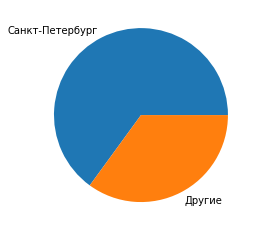

In [95]:
labels = 'Санкт-Петербург', 'Другие'
number = [14246, (21923-14246)]

plt.pie(number, labels=labels)

In [96]:
grouped_locality_1 = grouped_locality.sort_values(by='median', ascending=False).head(5)
grouped_locality_1

,median,count
locality_name,,
лисий нос,114316.5,2
санкт-петербург,104411.0,14246
зеленогорск,101666.5,22
сестрорецк,100985.0,173
пушкин,100000.0,343


<AxesSubplot:title={'center':'Населённые пункты с самой высокой стоимостью квадратного метра'}, xlabel='locality_name'>

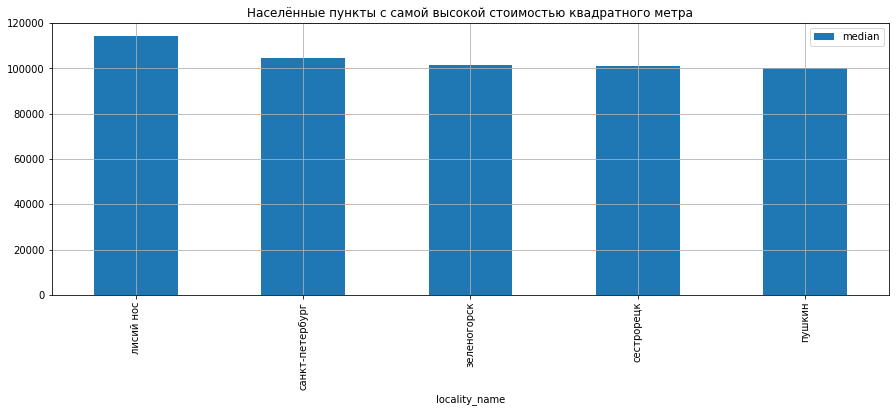

In [97]:
grouped_locality_1.plot(kind='bar', y='median', title='Населённые пункты с самой высокой стоимостью квадратного метра', \
          grid=True, figsize=(15,5))

In [98]:
grouped_locality_2 = grouped_locality.sort_values(by='median').head(5)
grouped_locality_2

,median,count
locality_name,,
старополье,11000.0,3
станции свирь,11481.0,2
вахнова кара,11842.0,1
выскатка,12335.0,2
совхозный,12628.5,2


<AxesSubplot:title={'center':'Населённые пункты с самой низкой стоимостью квадратного метра'}, xlabel='locality_name'>

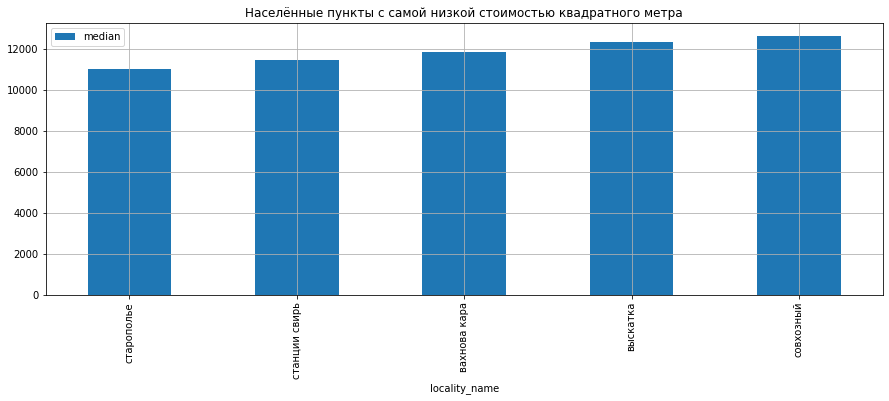

In [99]:
grouped_locality_2.plot(kind='bar', y='median', title='Населённые пункты с самой низкой стоимостью квадратного метра', \
          grid=True, figsize=(15,5))

**Вывод:**
1. Больше всего объявлений в Санкт-Петербурге, 14246 из 21923. Это 65% от общего количества.
2. Населенные пункты с самой высокой стоимостью квадратного метра: Санкт-Петербург, Лисий нос, Зеленогорск, Сестрорецк, Пушкин. Цена за квадратный метр от 100 до 114 тыс. руб.
3. Населенные пункты с самой низкой стоимостью квадратного метра: Старополье, поселок станции Свирь, деревня Вахнова Кара, Выскатка, Совхозный. Цена за квадратный метр от 11 до 12,6 тыс. руб.

**4.4 Ранее мы посчитали расстояние до центра в километрах. Теперь выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра.**
Опишите, как стоимость объектов зависит от расстояния до центра города

In [100]:
pd.set_option('display.max_columns', None)

<AxesSubplot:xlabel='citycenters_nearest_km'>

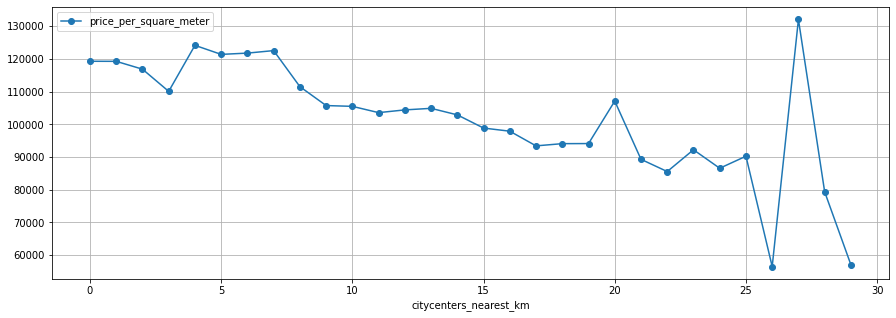

In [101]:
(
    data.query('locality_name == "санкт-петербург" and citycenters_nearest_km !=55555')
    .pivot_table(index='citycenters_nearest_km',values='price_per_square_meter', aggfunc='median')
    .plot(grid=True, style ='o-', figsize=(15,5))
)

In [102]:
data.query('citycenters_nearest_km == 27 and locality_name == "санкт-петербург"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,anomaly,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,type_floor,citycenters_nearest_km
748,13,14350000,74,2017-11-28,2,3.13,5,30,3,False,False,False,25,0,санкт-петербург,23888.0,27313,1,1496.0,0,NaN,128.0,результат верен,193918,1,11,2017,другой,27
5961,6,2250000,32,2018-02-27,1,2.65,2,16,2,False,False,False,7,0,санкт-петербург,24006.0,27431,0,NaN,0,NaN,178.0,результат верен,70312,1,2,2018,последний,27


In [103]:
data.query('citycenters_nearest_km == 26 and locality_name == "санкт-петербург"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,anomaly,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,type_floor,citycenters_nearest_km
7732,20,3975000,74,2018-08-20,3,3.20,3,43,2,False,False,False,14,0,санкт-петербург,22679.0,26104,0,NaN,1,498.0,112.0,результат верен,53716,0,8,2018,другой,26
14146,18,4150000,36,2018-09-05,1,2.50,10,20,7,False,False,False,7,1,санкт-петербург,22603.0,26027,0,NaN,0,NaN,45.0,результат верен,115277,2,9,2018,другой,26
18378,9,2600000,46,2017-11-10,1,2.65,2,20,1,False,False,False,15,0,санкт-петербург,22861.0,26286,0,NaN,0,NaN,29.0,результат верен,56521,4,11,2017,первый,26


**Вывод:**
Цена за квадратный метр в Санкт-Петербурге напрямую зависит от расстояния до центра города. Больше всего ценятся квартиры в радиусе 7 км от центра. Цена за квадратный метр достигает 125 тыс.руб. 
На графике видно как цена падает после 7 км, и к 20 км от центра снижается до 95 тыс. за кв. метр.

Неожиданный спад на 26 км и подъем на 27 км.
Отфильтровав таблицу по этим выпадающим значениям, можно увидеть, что выборки маленькие. На 27 км выборка из 2 объявлений и неожиданнаный выброс в большую сторону, а на 26 км - 3 объявления с очень низкой стоиомстью. Этими данными можно пренебречь, делать выводы по маленьким выборкам некорректно.



### Общий вывод

    
Исследование было проведено на основе данных сервиса Яндекс.Недвижимость - архива объявлений о продаже квартир в  Санкт-Петербурге и соседних населённых пунктов за несколько лет. 
   
1. Перед анализом была проделана предварительная обработка данных. 
    В данных было обнаружено много пропущенных значений. Высота потолка - 38%, информация об аппартементах - 88%, информация о балконах - 48%, жилая площадь - 8%, площадь кухни - 9%,  ближайший аэропорт - 23%, расстояние до центра - 65%,  расстояние до парка - 65%, количество парков в радиусе  3 км - 23%, расстояние до пруда - 61%, пруд в радиусе  3 км - 23%, количество дней объявления - 13%.
    Мы восстановили пропущенные значения там, где это возможно: высота потолка, информация об аппартементах, информация о балконах информация о балконах, жилая площадь, площадь кухни. Где невозможно было восстановить, оставили пропуски.
    Аномальные значения, такие как: квартиры стоимостью выше 20 млн руб, жилой площадью более 150 кв.м, количеством комнат больше 4 и объявления, которым более 800 дней - были удалены.
    В результате предобработки осталось 21923 строки из 23698. Это 92,5% от исходного датасета.
    
2. В результате анализа, изучены параметры и установлено, что большинство квартир:
    - стоят от 3 млн до 6,3 млн
    - имеет площадь от 39 кв.м до 65 кв.м.
    - жилой площадью от 18 кв.м до 40 кв.м.
    - площадь кухни от 6 кв.м до 11 кв.м. 
    - преобладают квартиры с 1 и 2-мя комнатами, реже встречаются студии и 4-комнатные
    - высота потолка 2,60-2,70 к
    - находятся до 6 этажа, реже - выше 10 этажа
    - находится не на первом и не на последнем этажа, квартиры на первом и последнем этаже в меньшинстве
    - 5-и и 9-этажные дома преобладают в датасете
    - находятся от 300 до 600 метров от парков 
    Меньше всего объявлений выставляют в выходные дни: субботу и воскресенье. В остальные дни недели активность примерно одинаковая. Также можно отметить, что больше всего активности с февраля по май. Летом активность спадает, осенью растет и достигает пика в ноябре.
    Можно сказать, что в среднем продажа занимает от 43 дней до 206 дней. Объявления, висящие более 450 дней, можно назвать необычно долгими продажами. 
    
3. В ходе анализа были установлены параметры, влияющие на рыночную стоимость квартиры.
    
    Больше всего влияет на полную стоимость квартиры - общая площадь. Коэффициент корреляции составляет 0,75. Чем больше площадь - тем больше стоимость. Жилая площадь также влияет на полную стоимость квартиры, но уже в меньшей степени. Коэффициент корреляции 0,63. Корреляция площади кухни и полной стоимости квартиры - 0,56. Зависимость есть, но маленькая.
    
    Количество комнат влияет на полную стоимость квартиры. Это и логично, так как чем больше комнат - тем больше площадь квартиры, значит и цена больше.
    
    На первом этаже квартиры дешевле всего. На последнем немного дороже первого, но дешевле чем остальные.
    
    В мае и июне небольшой спад цен по сравнению с остальными месяцами. Скорее всего, это не сезон для рынка недвижимости и люди стараются продать засчет понижения цен.
    
    В 2014 году стоимость на квартиры была самая высокая. В 2015 году произошло падение цен. 2016,2017,2018 - уровень цен сохранялся примерно на одинаковом уровне. В 2019 году был небольшой подъем.
    
    Больше всего объявлений в Санкт-Петербурге, 14246 из 21923. Это 65% от общего количества.
    Населенные пункты с самой высокой стоимостью квадратного метра: Санкт-Петербург, Лисий нос, Зеленогорск, Сестрорецк, Пушкин. Цена за квадратный метр от 100 до 114 тыс. руб.
    Населенные пункты с самой низкой стоимостью квадратного метра: Старополье, поселок станции Свирь, деревня Вахнова Кара, Выскатка, Совхозный. Цена за квадратный метр от 11 до 12,6 тыс. руб.

Цена за квадратный метр в Санкт-Петербурге напрямую зависит от расстояния до центра города. Больше всего ценятся квартиры в радиусе 7 км от центра. Цена за квадратный метр достигает 125 тыс.руб. Цена падает после 7 км, и к 20 км от центра снижается до 95 тыс. за кв. метр.

    
